## Importing needed libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


## Data downloading

In [3]:
data_all = pd.read_csv("https://osf.io/download/4ay9x/")

/var/folders/rt/ht2w66yn71737qv5l2n9w4s00000gn/T/ipykernel_10199/1431743875.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all = pd.read_csv("https://osf.io/download/4ay9x/")


## Selecting occupations: Computer programmers; Software developers, applications and systems software; Web developers

In [4]:
data = data_all[data_all['occ2012'].isin([1010, 1020, 1030])]

In [5]:
data.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
155,346,673032906039520,January,AK,411.5571,1346.15,40,39,3,NaN,...,0,0,"Native, Born In US",94,Executive offices and legislative bodies (9211...,1030,Government - Local,No,No,Employed-At Work
293,651,207004430306994,January,AZ,3410.8853,2500.00,40,44,4,NaN,...,0,0,"Foreign Born, US Cit By Naturalization",86,Computer systems design and related services (...,1020,"Private, For Profit",No,No,Employed-At Work
296,657,236096309400800,January,AZ,3916.3279,2500.00,40,43,4,NaN,...,2,10,"Foreign Born, US Cit By Naturalization",86,Business support services (5614),1020,"Private, For Profit",No,No,Employed-At Work
324,724,914299270769003,January,AZ,5115.4707,1250.00,45,43,1,NaN,...,0,0,"Native, Born In US",86,Computer systems design and related services (...,1020,"Private, For Profit",No,No,Employed-At Work
404,913,138098329500878,January,AR,1786.4459,700.00,40,43,1,NaN,...,0,0,"Native, Born In US",71,Offices of physicians (6211),1030,Government - State,No,No,Employed-At Work


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2067 entries, 155 to 149221
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2067 non-null   int64  
 1   hhid        2067 non-null   int64  
 2   intmonth    2067 non-null   object 
 3   stfips      2067 non-null   object 
 4   weight      2067 non-null   float64
 5   earnwke     2067 non-null   float64
 6   uhours      2067 non-null   int64  
 7   grade92     2067 non-null   int64  
 8   race        2067 non-null   int64  
 9   ethnic      90 non-null     float64
 10  age         2067 non-null   int64  
 11  sex         2067 non-null   int64  
 12  marital     2067 non-null   int64  
 13  ownchild    2067 non-null   int64  
 14  chldpres    2067 non-null   int64  
 15  prcitshp    2067 non-null   object 
 16  state       2067 non-null   object 
 17  ind02       2067 non-null   object 
 18  occ2012     2067 non-null   int64  
 19  class       2067 non-null   

### Ethnic variable has only 90 non-null values, and unioncov 2012 out of 2067. All other variables do not have missing values

In [7]:
data['grade92'].value_counts()

grade92
43    1098
44     505
40     184
42      98
39      71
41      60
46      37
45       9
37       2
38       2
36       1
Name: count, dtype: int64

In [8]:
data['class'].value_counts()

class
Private, For Profit     1796
Private, Nonprofit        92
Government - Federal      81
Government - State        74
Government - Local        24
Name: count, dtype: int64

## Creating variables

In [9]:
# Creating basic variables such as gender, age, and log of the dependent variable
data["female"] = (data["sex"] == 2)
data["w"] = data["earnwke"] / data["uhours"]
data["lnw"] = np.log(data["w"])
data["agesq"] = np.power(data["age"], 2)

# Creating education variables
data["ed_MA"] = (data["grade92"] == 44).astype(int)
data["ed_Phd"] = (data["grade92"] == 46).astype(int)

# Creating interaction terms between gender and education levels
data["female_ed_MA"] = data["female"] * data["ed_MA"]
data["female_ed_Phd"] = data["female"] * data["ed_Phd"]

# Creating the 'priv' column for private classes
data["priv"] = data["class"].isin(['Private, For Profit', 'Private, Nonprofit']).astype(int)
# Creating the 'gover' column for government classes
data["gover"] = data["class"].isin(['Government - Federal', 'Government - State', 'Government - Local']).astype(int)

/var/folders/rt/ht2w66yn71737qv5l2n9w4s00000gn/T/ipykernel_10199/3891593506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["female"] = (data["sex"] == 2)
/var/folders/rt/ht2w66yn71737qv5l2n9w4s00000gn/T/ipykernel_10199/3891593506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["w"] = data["earnwke"] / data["uhours"]
/var/folders/rt/ht2w66yn71737qv5l2n9w4s00000gn/T/ipykernel_10199/3891593506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Distribution of earnings

In [10]:
data.loc[:, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,2067.000000,2067.000000,2067.000000
mean,1554.762545,41.374940,37.508938
std,679.648500,6.525637,15.908843
min,2.000000,4.000000,0.050000
25%,1040.000000,40.000000,25.000000
50%,1500.000000,40.000000,36.050000
75%,2000.000000,40.000000,48.076750
max,2884.610000,80.000000,120.192083


In [11]:
data.loc[data["w"] >= 1, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,2066.000000,2066.000000,2066.000000
mean,1555.514124,41.375605,37.527069
std,678.953328,6.527147,15.891319
min,37.000000,4.000000,2.307500
25%,1042.017500,40.000000,25.000000
50%,1500.000000,40.000000,36.050000
75%,2000.000000,40.000000,48.076750
max,2884.610000,80.000000,120.192083


In [12]:
data["female"].value_counts()

female
False    1578
True      489
Name: count, dtype: int64

In [13]:
data.groupby(["occ2012", "female"]).size()

occ2012  female
1010     False      409
         True       107
1020     False     1044
         True       291
1030     False      125
         True        91
dtype: int64

### We see that the majority of samples is male 

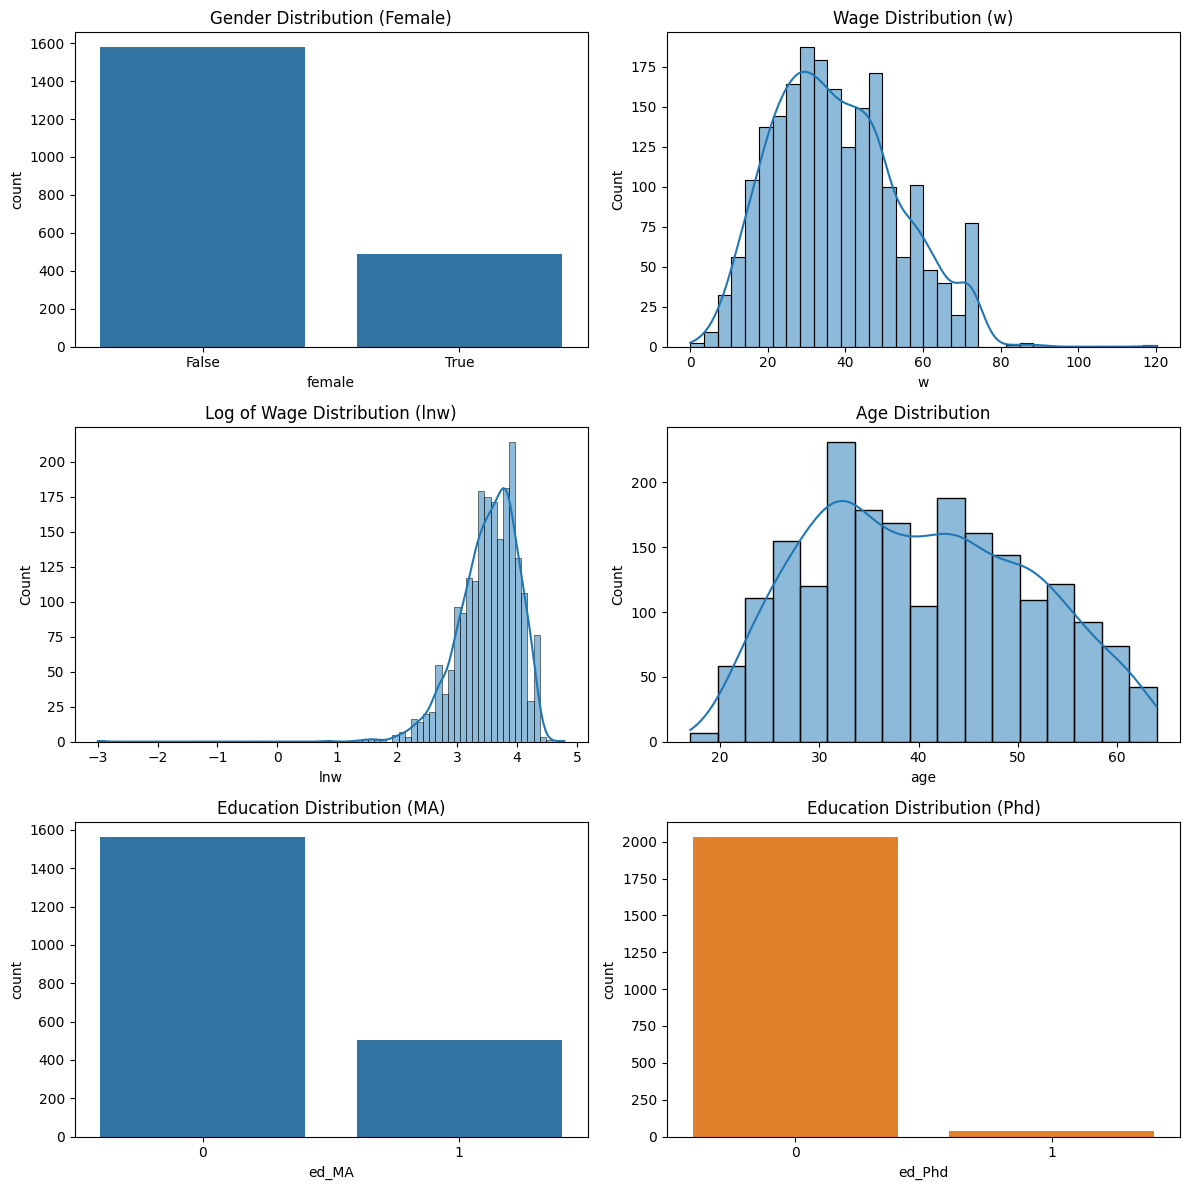

In [14]:
# Plotting distributions for the new variables created
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Female variable distribution
sns.countplot(data=data, x='female', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution (Female)')

# Wage distribution (w)
sns.histplot(data['w'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Wage Distribution (w)')

# Log of wage distribution (lnw)
sns.histplot(data['lnw'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Log of Wage Distribution (lnw)')

# Age distribution
sns.histplot(data['age'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution')

# Education levels distribution (MA, PhD)
sns.countplot(data=data, x='ed_MA', ax=axes[2, 0])
axes[2, 0].set_title('Education Distribution (MA)')
sns.countplot(data=data, x='ed_Phd', ax=axes[2, 1])
axes[2, 1].set_title('Education Distribution (Phd)')
sns.countplot(data=data, x='ed_Phd', ax=axes[2, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()